## Check how many different person are in the AMASS dataset

#### Relative packages

In [11]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

#### Start from ACCAD

In [4]:
# Start from ACCAD
dataPath = "/home/kxue/Work/MotionGen/HumanML3D/"

datasets = [
    "ACCAD/ACCAD/",
    "BMLhandball/",
    "BMLmovi/BMLmovi/",
    "BMLrub/BioMotionLab_NTroje/",
    "CMU/CMU/",
    "DanceDB/DanceDB/",
    "DFaust/DFaust_67",
    "EKUT/EKUT/",
    "EyesJapanDataset/Eyes_Japan_Dataset/",
    "GRAB/",
    "HUMAN4D/HUMAN4D/",
    "HDM05/MPI_HDM05/",
    "HumanEva/HumanEva/",
    "KIT/KIT/",
    "MoSh/MPI_mosh/",
    "PosePrior/MPI_Limits/",
    "SFU/SFU/",
    "SOMA/",
    "SSM/SSM_synced/",
    "TCDHands/TCD_handMocap/",
    "TotalCapture/TotalCapture/",
    "Transitions/Transitions_mocap/",
    "WEIZMANN/",
]

In [5]:
shapes = {}

for dataset in datasets:
    folders = os.listdir(dataPath + dataset)
    for folder in folders:
        if not os.path.isdir(dataPath + dataset + folder):
            continue
        files = os.listdir(dataPath + dataset + folder)
        shapesPerFolder = set()
        for file in files:
            data = np.load(dataPath + dataset + '/' + folder + '/' + file)
            if "poses" not in data.files:
                continue
            shape = tuple(data.f.betas)
            frames = data.f.poses.shape[0]
            if "mocap_framerate" in data.files:
                frameRate = data.f.mocap_framerate
            else:
                frameRate = data.f.mocap_frame_rate
            if shape not in shapes.keys():
                shapes[shape] = {"motion":[], "frames":[], "time":[], "frameRate":[]}
            shapes[shape]["motion"].append(dataset + '/' + folder + '/' + file)
            shapes[shape]["frames"].append(frames)
            shapes[shape]["frameRate"].append(frameRate)
            shapes[shape]["time"].append(frames/frameRate)

In [7]:
import pickle 

with open('shapes.pkl', 'wb') as f:
    pickle.dump(shapes, f)

#### number of different persons

In [10]:
len(shapes.keys())

491

#### check if there exist a shape with different frame rate

In [8]:
keys = shapes.keys()
numFrameRate = np.zeros(len(keys))
for idx, key in enumerate(keys):
    frameRate = set(np.stack(shapes[key]["frameRate"]))
    numFrameRate[idx] = len(frameRate)

In [9]:
numFrameRate[np.where(numFrameRate>=2)[0]] 

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

#### Distribution of the number of frames

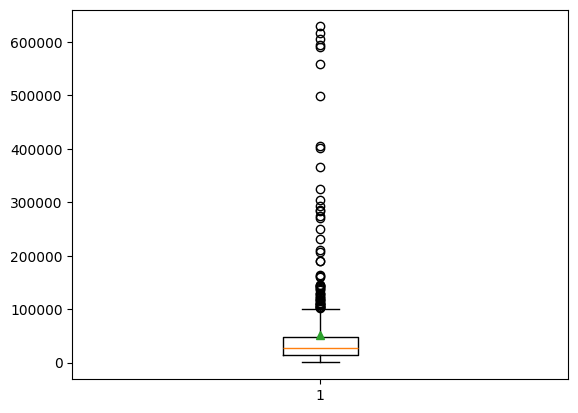

51025.64154786151 27024.0 2844.0


In [32]:
frames = np.zeros(len(keys))
for idx, key in enumerate(keys):
    frame = np.sum(shapes[key]["frames"])
    frames[idx] = frame
plt.boxplot(frames, showmeans=True)
plt.show()
print(np.mean(frames), np.median(frames), np.quantile(frames, 0.05))

#### Range of the number of motions

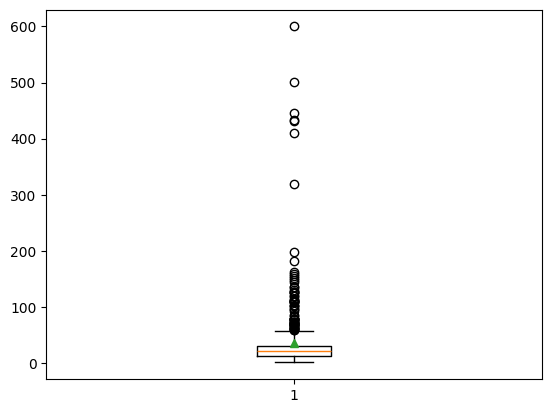

36.14256619144603 21.0 2.0


In [31]:
motions = np.zeros(len(keys))
for idx, key in enumerate(keys):
    numMotion = len(shapes[key]["motion"])
    motions[idx] = numMotion
plt.boxplot(motions, showmeans=True)
plt.show()
print(np.mean(motions), np.median(motions), np.quantile(motions, 0.05))